# Data Generation Process with NumPy

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('mosquitos_data.csv')

In [10]:
df.head()

,Response,Treatment
0,27,Beer
1,20,Beer
2,21,Beer
3,26,Beer
4,27,Beer


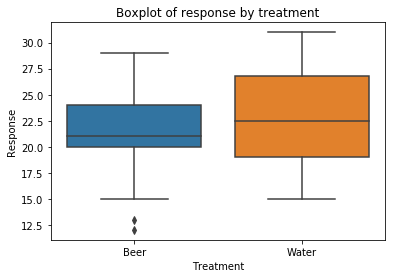

In [34]:
sns.boxplot( x=df["Treatment"], y=df["Response"] )
plt.title('Boxplot of response by treatment')
plt.show()

** What does the graph reveal about the data for both groups?**<br>

The boxplot reveals that:
* the data distribution is nearly normal for both groups.
* the interquartile range IQR of the beer data is larger than the IQR of the water data.
* data spread is similar for both groups.
* beer data is almost symmetric and water data is sligthly skewed to the left.

** Is there an association between beer consumption and attractiveness to mosquitos?**<br>
The data shows that beer consumption increases the attractiveness to mosquitos.


In [12]:
df_beer = df[df['Treatment'] == 'Beer'].Response
df_beer.describe()

count    25.000000
mean     23.600000
std       4.133199
min      17.000000
25%      20.000000
50%      24.000000
75%      27.000000
max      31.000000
Name: Response, dtype: float64

In [13]:
df_water = df[df['Treatment'] == 'Water'].Response
df_water.describe()

count    18.000000
mean     19.222222
std       3.671120
min      12.000000
25%      16.500000
50%      20.000000
75%      22.000000
max      24.000000
Name: Response, dtype: float64

In [29]:
diff_mean = df_beer.mean() - df_water.mean()
diff_mean

4.37777777777778

In [18]:
np.std(df_beer.values, ddof=1)

4.1331989225457484

In [19]:
np.std(df_water.values, ddof=1)

3.6711202899124045

** Basic statistics** <br>
The response mean of beer treatment is higher than the response mean of water treatment. This difference is aprox. 4.4 points.<br>
Similarly, the spread of beer data is greater than the water data, with a standard deviation of 4.13 and 3.67 respectively.<br>
The median and mean of each group are comparable between them, showing that there are not extreme observations in the data.


## Simulation

In [21]:
array = df.Response.values

In [22]:
def getdiff(array):
    array_diff = np.arange(1000000, dtype=np.float64)
    for i in range(len(array_diff)):
        np.random.shuffle(array)
        split = np.split(array, [25], axis=0)
        diff = np.mean(split[0]) - np.mean(split[1])
        array_diff[i] = diff
    return array_diff

In [23]:
y = getdiff(array)

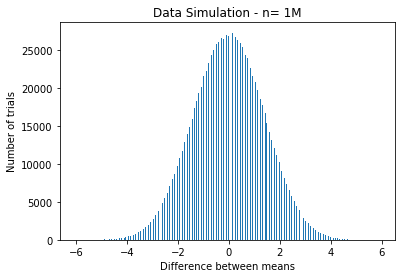

In [25]:
import matplotlib.pyplot as plt
plt.hist(y, bins='auto')
plt.title("Data Simulation - n= 1M")
plt.ylabel('Number of trials')
plt.xlabel('Difference between means')
plt.show()

In [32]:
len(y[y >= diff_mean])

491

In [31]:
len(y[y >= diff_mean])/1000000

0.000491

**A difference of 4.38  or higher is extremely uncommon, it only happens 491 times in 1 million of trials, so the skeptical hypothesis can be rejected. There is a correlation between beer consumption and mosquitos attractiveness. **